Zad 1:
Wiadomo, że∫1<-0 (4/(1 +x^2) dx = π .Powyższą równość można wykorzystać do obliczenia przybliżonej wartościπpo-przez całkowanie numeryczne.

(a) Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur otwar-tej prostokątów (ang. mid-point rule), trapezów i Simpsona. Można wyko-rzystać funkcjeintegrate.trapziintegrate.simpsz bibliotekiscipy. Naprzedziale całkowania rozmieść2m+1równoodległych węzłów. W kolejnychpróbachmwzrasta o 1, tzn. między każde dwa sąsiednie węzły dodawanyjest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie. Przyjmij zakreswartościmod 1 do 25.Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnegow zależności od liczby ewaluacji funkcji podcałkowej,n+ 1(gdzien=1/h, z krokiemh). Wyniki przedstaw na wspólnym wykresie, używając skalilogarytmicznej na obu osiach.

(b) Czy istnieje pewna wartość, poniżej której zmniejszanie krokuhnie zmniej-sza już błędu kwadratury? Porównaj wartośćhmin, odpowiadającą mini-mum wartości bezwzględnej błędu względnego, z wartością wyznaczoną wlaboratorium 1.

(c) Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rządzbieżności przewidywanym przez teorię. Aby wyniki miały sens, do oblicze-nia rzędu empirycznego użyj wartościhz zakresu, w którym błąd metodyprzeważa nad błędem numerycznym.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz
from scipy.special import roots_legendre
import math

In [16]:
# Funkcja do całkowania
def f(x):
    return 4 / (1 + x**2)

In [17]:
# Metoda prostokątów (mid-point rule)
def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        x_mid = a + (i + 0.5) * h
        integral += f(x_mid)
    integral *= h
    return integral

In [18]:
# Metoda trapezów
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

In [5]:
# Dane
m_values = np.arange(1, 26)
n_values = 2 ** m_values + 1
integral_true = math.pi

In [21]:
# Obliczenia dla każdej metody
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []
for n in n_values:
    #integral_true, _ = quad(f, 0, 1)
    integral_midpoint = midpoint_rule(f, 0, 1, n)
    integral_trapezoidal = trapezoidal_rule(f, 0, 1, n)
    #integral_trapezoidal = simps(f(np.linspace(0, 1, n)), np.linspace(0, 1, n))
    integral_simpson = simps(f(np.linspace(0, 1, n)), np.linspace(0, 1, n))
    error_midpoint = np.abs((integral_midpoint - integral_true) / integral_true)
    error_trapezoidal = np.abs((integral_trapezoidal - integral_true) / integral_true)
    error_simpson = np.abs((integral_simpson - integral_true) / integral_true)
    errors_midpoint.append(error_midpoint)
    errors_trapezoidal.append(error_trapezoidal)
    errors_simpson.append(error_simpson)


/tmp/ipykernel_42009/3649879792.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simpson = simps(f(np.linspace(0, 1, n)), np.linspace(0, 1, n))


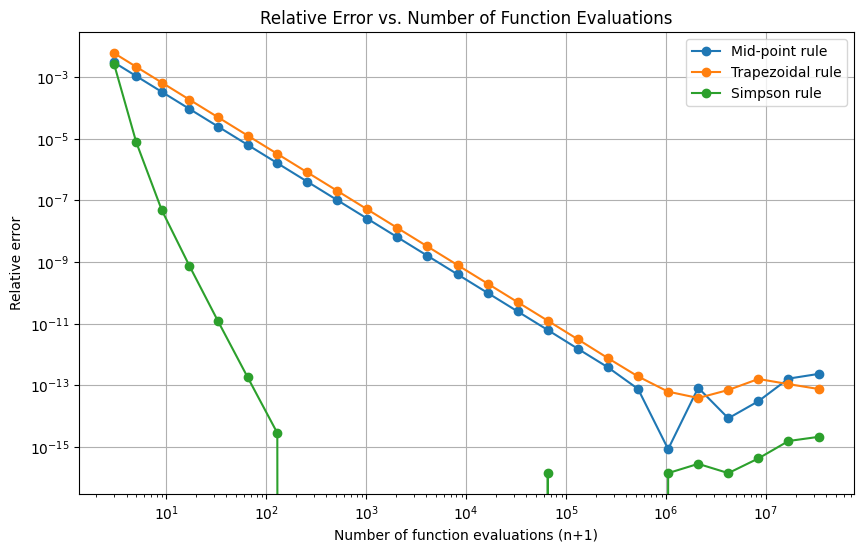

In [22]:
# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_midpoint, label='Mid-point rule', marker='o')
plt.plot(n_values, errors_trapezoidal, label='Trapezoidal rule', marker='o')
plt.plot(n_values, errors_simpson, label='Simpson rule', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations (n+1)')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Obliczanie rzędu zbieżności dla metody prostokątów
p_midpoint = np.log(errors_midpoint[-2] / errors_midpoint[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody trapezów
p_trapezoidal = np.log(errors_trapezoidal[-2] / errors_trapezoidal[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody Simpsona
p_simpson = np.log(errors_simpson[-2] / errors_simpson[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

print("Empiryczne rzędy zbieżności:")
print("Metoda prostokątów (mid-point rule):", p_midpoint)
print("Metoda trapezów:", p_trapezoidal)
print("Metoda Simpsona:", p_simpson)

Empiryczne rzędy zbieżności:
Metoda prostokątów (mid-point rule): 0.010374310566940662
Metoda trapezów: -0.010682545006028731
Metoda Simpsona: 0.009131815832517062


In [9]:
# Funkcja do generowania węzłów i wag dla metody Gaussa-Legendre'a
def gauss_legendre_nodes_weights(a, b, n):
    nodes = np.linspace(-1, 1, n)
    nodes = (b+a)/2 + (b-a)/2 * nodes
    weights = np.zeros(n)
    
    for i in range(n):
        weights[i] = math.pi/n
    
    return nodes, weights

In [10]:
# Metoda Gaussa-Legendre'a
def gauss_legendre_method(f, nodes, weights):
    integral = 0
    for i in range(len(nodes)):
        integral += weights[i] * f(nodes[i])
    return integral

In [11]:
#n = 10**7
errors_gl = [0 for _ in range(len(m_values))]
m_values2 = np.arange(1, 15)
n_values2 = 2 ** m_values2 + 1
a = 0
b = 1

In [12]:
for i, n in enumerate(n_values2):
    nodes, weights = roots_legendre(n+1)
    integral_approx = gauss_legendre_method(f, nodes, weights) * (b-a) / 2
    error_gauss_legendre = np.abs((integral_approx - integral_true) / integral_true)
    errors_gl[i] = (error_gauss_legendre)

In [23]:
print(errors_gl)

[0.0013807492273233584, 4.113803726239678e-05, 3.601461555726573e-08, 2.7282091267664832e-14, 2.8271597168564594e-16, 2.9685177026992824e-15, 3.392591660227751e-15, 1.003641699484043e-14, 2.6858017310136363e-14, 3.1381472857106696e-14, 4.622406137060311e-14, 2.911974508362153e-14, 3.1494559245780955e-13, 2.4525610543729786e-13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


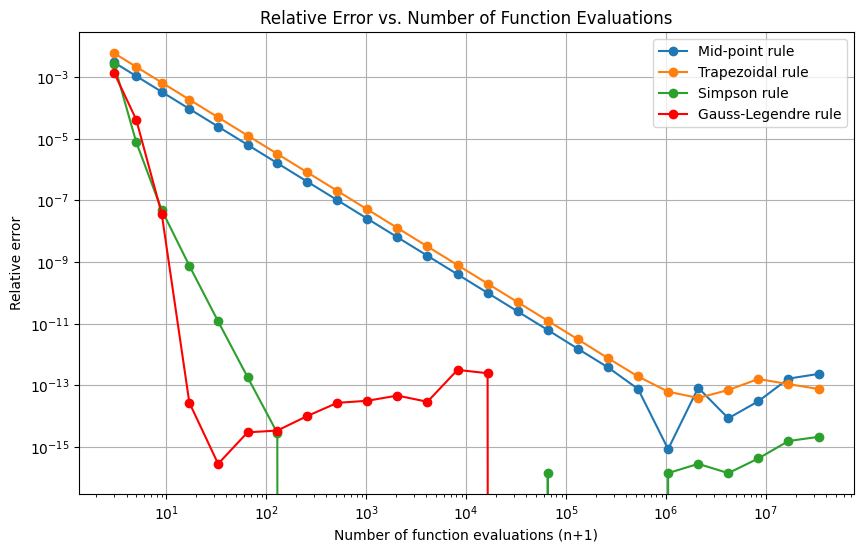

In [14]:
# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_midpoint, label='Mid-point rule', marker='o')
plt.plot(n_values, errors_trapezoidal, label='Trapezoidal rule', marker='o')
plt.plot(n_values, errors_simpson, label='Simpson rule', marker='o')
plt.plot(n_values, errors_gl, label='Gauss-Legendre rule', marker='o', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations (n+1)')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()